In [44]:
import torch
import torchvision
from torch import nn
from torchvision import datasets, models, transforms

from PIL import Image
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
import random
import shutil

import image_utils
import search_utils

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
def load_features(path, filenames):
    features = np.array([np.load(os.path.join(path, f + '.npy')) for f in filenames])
    features = StandardScaler().fit_transform(features)
    return(features)

In [3]:
def concat_features(feat1, feat2):
    feat_concat = np.concatenate([feat1, feat2], axis=1)
    feat_concat = StandardScaler().fit_transform(feat_concat)
    return feat_concat

# Load data

## Dresses

In [4]:
flist_products = glob.glob('../../data/fashion/dresses/*.jpg')
flist_products = sorted(flist_products)
fnames_products = [os.path.basename(f).split('.jpg')[0] for f in flist_products]

In [5]:
feat_path_products = '../../data/features/fashion/dresses/'
f_dirs_products = [f_dir for f_dir in os.listdir(feat_path_products) 
                   if os.path.isdir(os.path.join(feat_path_products, f_dir)) 
                   & ('pca' not in f_dir)]
f_dirs_products = sorted(f_dirs_products)

In [6]:
f_dirs_products

['akiwi_114', 'akiwi_50', 'akiwi_64', 'resnet', 'resnet_retrained']

In [7]:
feat_dict_products = {}
for f_dir in f_dirs_products:
    feat_dict_products[f_dir] = load_features(os.path.join(feat_path_products, f_dir), fnames_products)

In [8]:
feat_dict_products['resnet_50'] = concat_features(
    feat_dict_products['resnet'], feat_dict_products['akiwi_50']*100)
feat_dict_products['resnet_retrained_50'] = concat_features(
    feat_dict_products['resnet_retrained'], feat_dict_products['akiwi_50']*100)

## Models

In [9]:
flist_models = glob.glob('../../data/fashion_models/dresses_clustered2/*.jpg')
flist_models = sorted(flist_models)
fnames_models = [os.path.basename(f).split('.jpg')[0] for f in flist_models]

In [10]:
feat_path_models = '../../data/features/fashion_models/dresses/'
f_dirs_models = [f_dir for f_dir in os.listdir(feat_path_models) 
                 if os.path.isdir(os.path.join(feat_path_models, f_dir))]
f_dirs_models = sorted(f_dirs_models)

In [11]:
f_dirs_models

['akiwi_114', 'akiwi_50', 'akiwi_64', 'resnet', 'resnet_retrained']

In [12]:
feat_dict_models = {}
for f_dir in f_dirs_models:
    feat_dict_models[f_dir] = load_features(os.path.join(feat_path_models, f_dir), fnames_models)

In [13]:
feat_dict_models['resnet_50'] = concat_features(
    feat_dict_models['resnet'], feat_dict_models['akiwi_50']*100)
feat_dict_models['resnet_retrained_50'] = concat_features(
    feat_dict_models['resnet_retrained'], feat_dict_models['akiwi_50']*100)

# Test Search Features

In [42]:
def get_similar_imgs(img_path, img_files, features, title='', save_path=None, num_imgs=8):
    
    fig, axarr = plt.subplots(1, num_imgs, figsize=(num_imgs*3, 4))
    
    img_file_idx = img_files.index(img_path)
    img_feature = features[img_file_idx]
    
    dist = pairwise_distances(img_feature.reshape(1, -1), features)
    img_idxs = np.argsort(dist)[0].tolist()[:num_imgs]
    
    feat_dim = features.shape[1]

    for i, img_idx in enumerate(img_idxs):
        print(os.path.basename(img_files[img_idx]))
        img = Image.open(img_files[img_idx])
        img = img.crop((40, 0, 216, 256))
        ax = axarr[i]
        ax.set_xlabel(round(dist[0][img_idx] / feat_dim * 100, 2), fontsize=22)
#         ax.set_xlabel(os.path.basename(img_files[img_idx]), fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        
        for s in ax.spines.keys():
            ax.spines[s].set_visible(False)
        ax.imshow(img)
    
    fig.suptitle(title, fontsize=28)
    if save_path is not None:
        plt.savefig(os.path.join('./test_features_results/', save_path))
        
    plt.show()

5713733606269.jpg
EDT0956002000006.jpg
9758378.jpg
VIL2056001000004.jpg
VEM0051002000001.jpg
BOH0213001000004.jpg


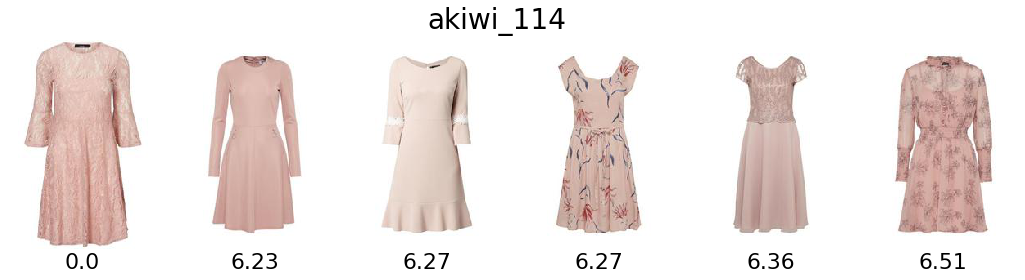

5713733606269.jpg
BOH0213001000004.jpg
M9121C2M7-G11.jpg
9768728.jpg
LAO0087001000001.jpg
CIL0131001000001.jpg


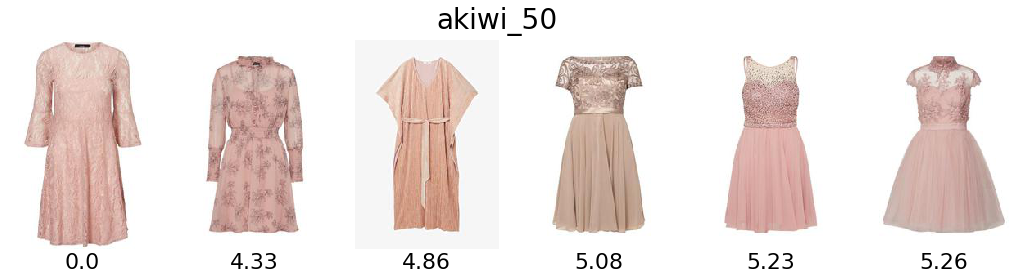

5713733606269.jpg
QS021C02W-M11.jpg
NN121C07W-Q11.jpg
SA321C05P-Q11.jpg
EV421CAAQ-Q12.jpg
IN321C02S-K12.jpg


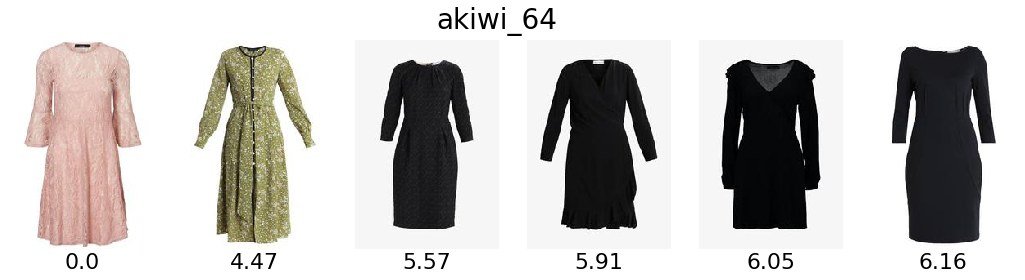

5713733606269.jpg
9806287.jpg
652868463.jpg
606416635.jpg
5713721824286.jpg
4053041212464.jpg


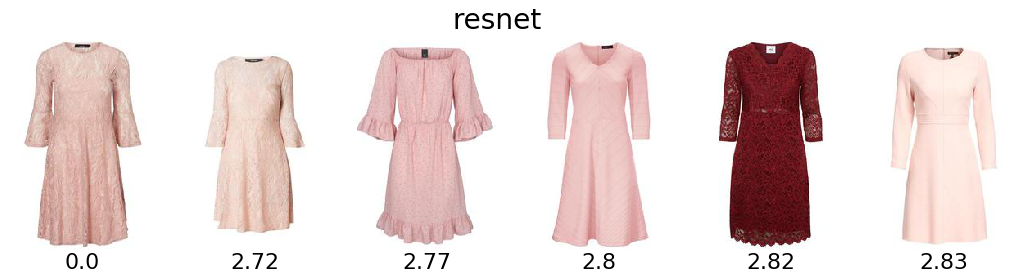

5713733606269.jpg
606416635.jpg
9806287.jpg
652868463.jpg
CAR0553001000001.jpg
4053041212464.jpg


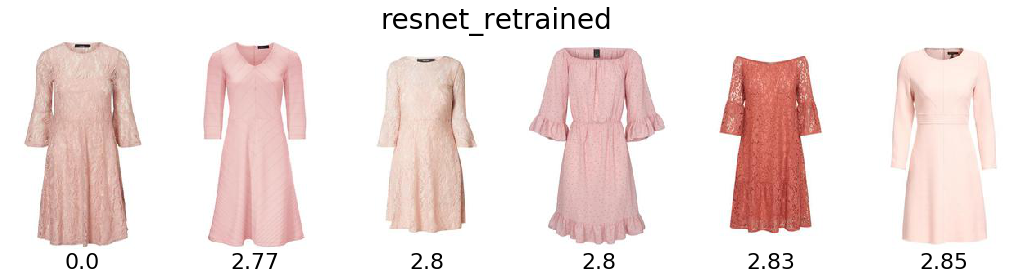

5713733606269.jpg
9806287.jpg
652868463.jpg
606416635.jpg
218115015-38.jpg
4053041212464.jpg


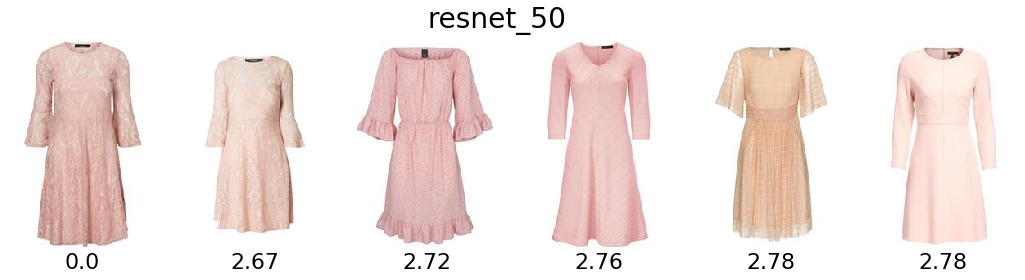

5713733606269.jpg
606416635.jpg
9806287.jpg
652868463.jpg
CAR0553001000001.jpg
4053041212464.jpg


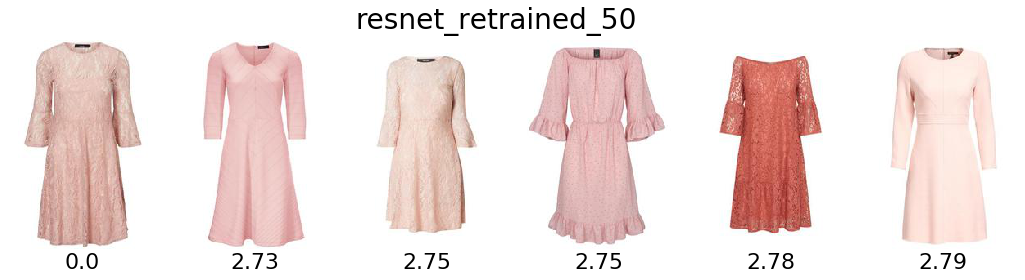

In [43]:
img_path = '../../data/fashion/dresses/5713733606269.jpg'
for key, features in feat_dict_products.items():
    get_similar_imgs(img_path, flist_products, features, title=key, num_imgs=6)

In [ ]:
img_path = '../../data/fashion/dresses/9746910.jpg'
for key, features in feat_dict_products.items():
    get_similar_imgs(img_path, flist_products, features, title=key)

In [ ]:
img_path = '../../data/fashion/dresses/7936091_794149242.jpg'
for key, features in feat_dict_products.items():
    get_similar_imgs(img_path, flist_products, features, title=key)

In [ ]:
img_path = './test_images/models_sample/9813987.jpg'
for key, features in feat_dict_models.items():
    get_similar_imgs(img_path, flist_models, features, title=key)

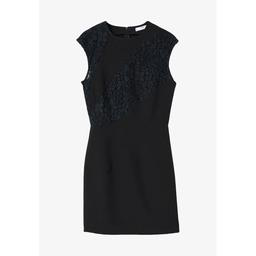

In [18]:
img_path = random.sample(flist_products, 1)[0]
Image.open(img_path)

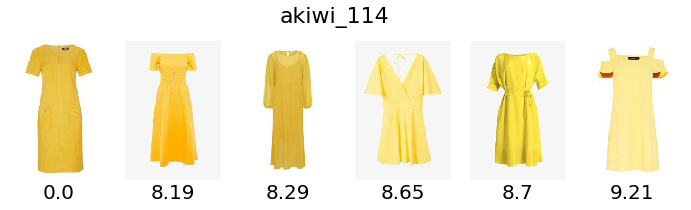

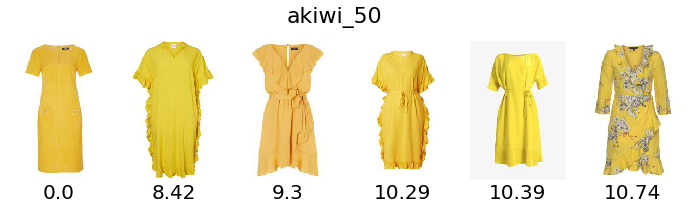

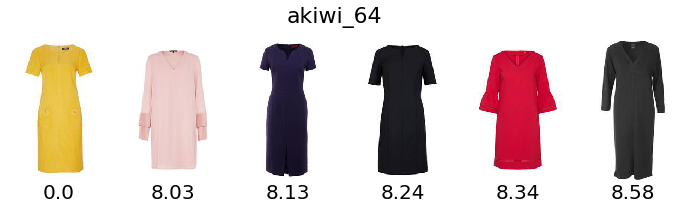

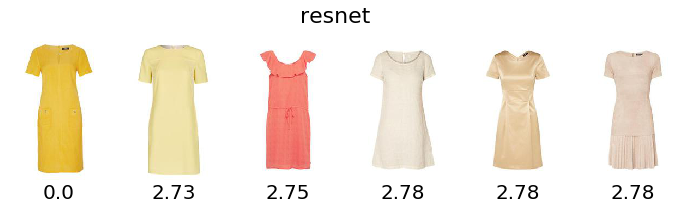

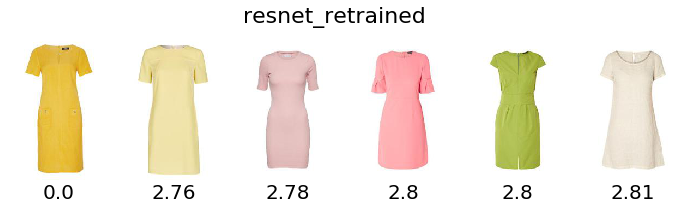

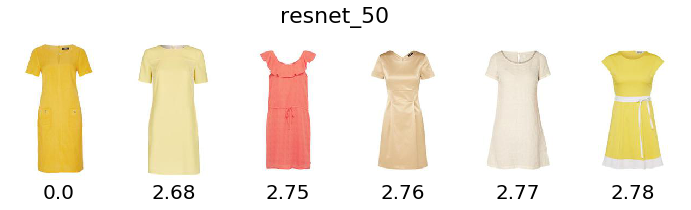

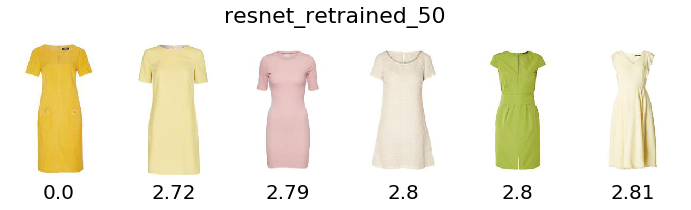

In [17]:
img_path = '../../data/fashion/dresses/11.806.82.7845_136336.jpg'
for key, features in feat_dict_products.items():
    get_similar_imgs(img_path, flist_products, features, title=key, num_imgs=6)

In [ ]:
img_path = './test_images/models_sample/9810193.jpg'
for key, features in feat_dict_models.items():
    get_similar_imgs(img_path, flist_models, features, title=key)

In [ ]:
img_path = '../../data/fashion/dresses/GAP0115001000001.jpg'
for key, features in feat_dict_products.items():
    get_similar_imgs(img_path, flist_products, features, title=key, num_imgs=6)

In [ ]:
img_path = '../../data/fashion/dresses/KD421C031-K11.jpg'
for key, features in feat_dict_products.items():
    get_similar_imgs(img_path, flist_products, features, title=key)

In [ ]:
img_path = '../../data/fashion/dresses/L4221C071-G11.jpg'
for key, features in feat_dict_products.items():
    get_similar_imgs(img_path, flist_products, features, title=key, num_imgs=6)

In [ ]:
img_path = '../../data/fashion/dresses/TEB0047001000001.jpg'
for key, features in feat_dict_products.items():
    get_similar_imgs(img_path, flist_products, features, title=key, num_imgs=6)

In [ ]:
img_path = '../../data/fashion/dresses/6890767_689063134.jpg'
for key, features in feat_dict_products.items():
    get_similar_imgs(img_path, flist_products, features, title=key, num_imgs=5)

In [ ]:
img_path = '../../data/fashion/dresses/2GU21C04R-K11.jpg'
for key, features in feat_dict_products.items():
    get_similar_imgs(img_path, flist_products, features, title=key, num_imgs=6)

In [ ]:
img_path = '../../data/fashion/dresses/9804780.jpg'
for key, features in feat_dict_products.items():
    get_similar_imgs(img_path, flist_products, features, title=key, num_imgs=5)

In [ ]:
img_path = '../../data/fashion/dresses/21815P1182-34.jpg'
for key, features in feat_dict_products.items():
    get_similar_imgs(img_path, flist_products, features, title=key)

In [ ]:
img_path = '../../data/fashion/dresses/13718630.jpg'
for key, features in feat_dict_products.items():
    get_similar_imgs(img_path, flist_products, features, title=key)

In [ ]:
img_path = './test_images/models_sample/13718630.jpg'
for key, features in feat_dict_models.items():
    get_similar_imgs(img_path, flist_models, features, title=key)

In [ ]:
img_path = './test_images/models_sample/SAA21C00D-Q11.jpg'
for key, features in feat_dict_models.items():
    get_similar_imgs(img_path, flist_models, features, title=key)

In [ ]:
img_path = './test_images/models_sample/4251250743766.jpg'
for key, features in feat_dict_models.items():
    get_similar_imgs(img_path, flist_models, features, title=key)